In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
longitude_range = (-180, 180)


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

615

In [4]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=709eaff6487fadf0c26e0bc441b8c854"
# Print (url)


# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")
        
        

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | sambava
Processing Record 2 of Set 1 | namanga
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | kudahuvadhoo
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | salobrena
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | port hardy
Processing Record 11 of Set 1 | meulaboh
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | plettenberg bay
Processing Record 15 of Set 1 | nichinan
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | emerald
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | lokosovo
Processing Record 23 of Set 1 | nizhneyansk
City not found. S

Processing Record 15 of Set 4 | hamilton
Processing Record 16 of Set 4 | srednekolymsk
Processing Record 17 of Set 4 | merke
Processing Record 18 of Set 4 | ilulissat
Processing Record 19 of Set 4 | lazaro cardenas
Processing Record 20 of Set 4 | pevek
Processing Record 21 of Set 4 | santa cruz del sur
Processing Record 22 of Set 4 | aberdeen
Processing Record 23 of Set 4 | erenhot
Processing Record 24 of Set 4 | ponta do sol
Processing Record 25 of Set 4 | brignoles
Processing Record 26 of Set 4 | bambous virieux
Processing Record 27 of Set 4 | tasiilaq
Processing Record 28 of Set 4 | isla vista
Processing Record 29 of Set 4 | tuktoyaktuk
Processing Record 30 of Set 4 | labuan
Processing Record 31 of Set 4 | sechura
Processing Record 32 of Set 4 | gornopravdinsk
Processing Record 33 of Set 4 | comodoro rivadavia
Processing Record 34 of Set 4 | mount isa
Processing Record 35 of Set 4 | tsihombe
City not found. Skipping ...
-----------------------
Data Retrieval Complete
---------------

Processing Record 38 of Set 7 | ketchikan
Processing Record 39 of Set 7 | juifang
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 40 of Set 7 | vardo
Processing Record 41 of Set 7 | isugod
Processing Record 42 of Set 7 | capinzal
Processing Record 43 of Set 7 | torbay
Processing Record 44 of Set 7 | macusani
Processing Record 45 of Set 7 | constitucion
Processing Record 46 of Set 7 | varzea da palma
Processing Record 47 of Set 7 | prado
Processing Record 48 of Set 7 | krasnoselkup
Processing Record 49 of Set 7 | gorno-chuyskiy
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 0 of Set 8 | hofn
Processing Record 1 of Set 8 | naze
Processing Record 2 of Set 8 | pudozh
Processing Record 3 of Set 8 | sehore
Processing Record 4 of Set 8 | kralendijk
Processing Record 5 of Set 8 | alindao
Processing Record 6 of Set 8 | wanganui
Processing Record 7 of Set

Processing Record 47 of Set 10 | camacha
Processing Record 48 of Set 10 | la ronge
Processing Record 49 of Set 10 | ivanovka
Processing Record 0 of Set 11 | itarema
Processing Record 1 of Set 11 | paamiut
Processing Record 2 of Set 11 | masvingo
Processing Record 3 of Set 11 | sinnamary
Processing Record 4 of Set 11 | the valley
Processing Record 5 of Set 11 | cayenne
Processing Record 6 of Set 11 | lastoursville
Processing Record 7 of Set 11 | kununurra
Processing Record 8 of Set 11 | paraiso
Processing Record 9 of Set 11 | qasigiannguit
Processing Record 10 of Set 11 | puerto madero
Processing Record 11 of Set 11 | andenes
Processing Record 12 of Set 11 | verkhnevilyuysk
Processing Record 13 of Set 11 | lagos
Processing Record 14 of Set 11 | grand centre
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 15 of Set 11 | carutapera
Processing Record 16 of Set 11 | kyenjojo
Processing Record 17 of Set 11 | kalakamati
Pr

In [5]:
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Windspeed     562
dtype: int64

In [6]:
# Display the city Data Frame
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,sambava,20,MG,1651347366,89,-14.2667,50.1667,75.79,9.22
1,namanga,89,KE,1651347366,85,-2.5433,36.7905,65.91,4.29
2,cape town,0,ZA,1651347367,79,-33.9258,18.4232,60.28,4.61
3,kudahuvadhoo,87,MV,1651347368,69,2.6708,72.8944,85.62,16.73
4,kodiak,100,US,1651347368,93,57.7900,-152.4072,38.71,31.07


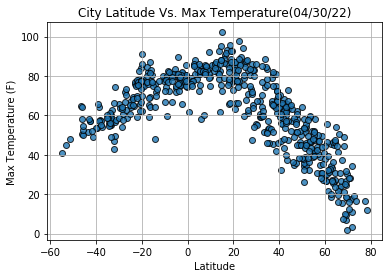

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

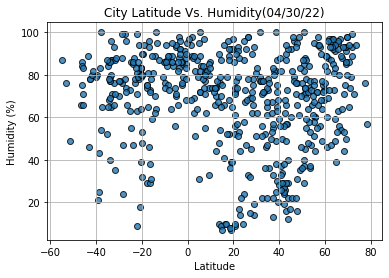

In [9]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

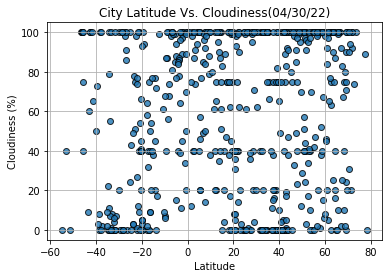

In [10]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

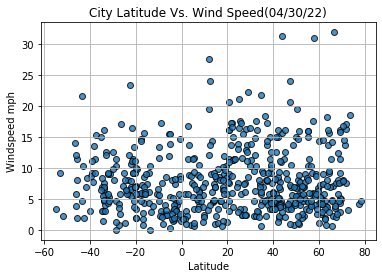

In [11]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

The r-squared is: -0.872743226189379


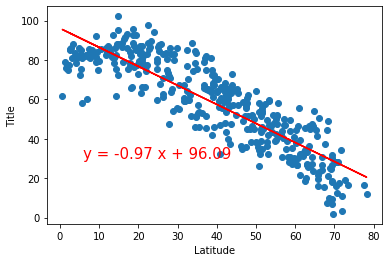

In [15]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.7790095380084997


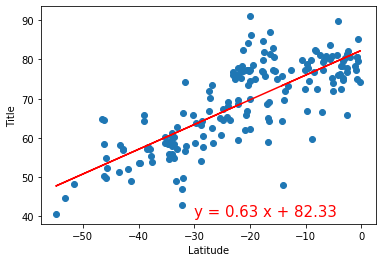

In [16]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))


The r-squared is: 0.11857088334637772


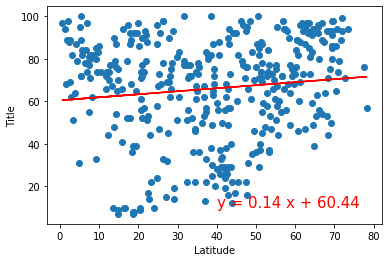

In [17]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.20592598554787694


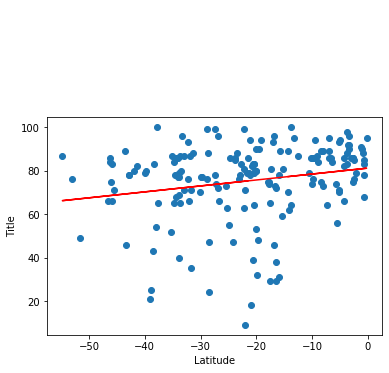

In [18]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

The r-squared is: 0.00772128294190198


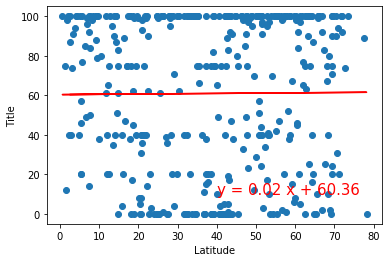

In [19]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.2553586390184298


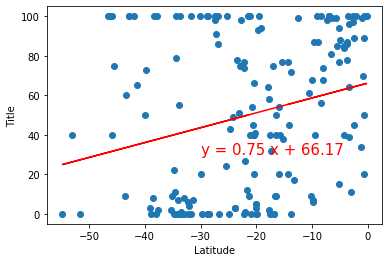

In [20]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

The r-squared is: 0.007829765304423027


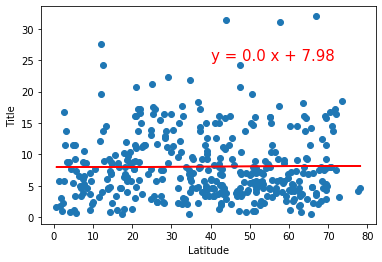

In [21]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.1902589617677716


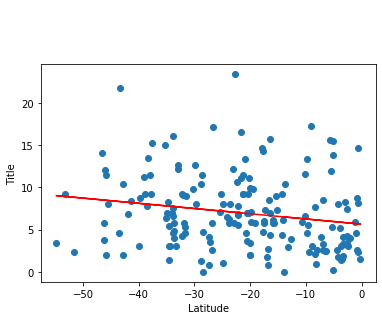

In [22]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))